In [2]:
######################## Enable dependency update as needed ################################
#!pip install matplotlib --upgrade
############################################################################################

from plotter import *
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

Plotter.escapeTime=5000

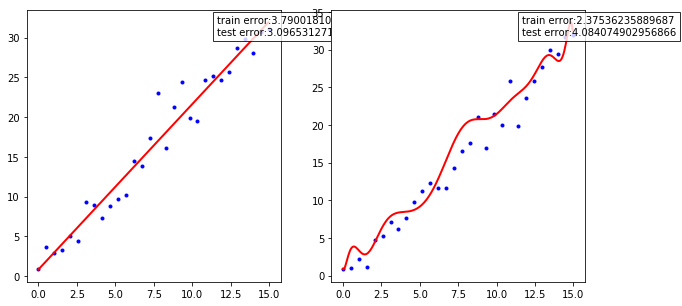

In [3]:
#real model
f=lambda x:2*x+x**0.01

#generate test data
x_train = np.linspace(0, 15, 30)
y_train = np.vectorize(f)(x_train) + 2 * np.random.normal(size=x_train.size)#y=f(x)+noise

#generate test data
x_test = np.linspace(0, 15, 30)
y_test = np.vectorize(f)(x_test) + 2 * np.random.normal(size=x_test.size)#y=f(x)+noise

prop = np.polyfit(x_train,y_train,1)
prop_   = np.poly1d(prop)
overf   = np.polyfit(x_train, y_train, 15)
overf_  = np.poly1d(overf)

Plotter.train_error=list()
Plotter.test_error=list()
Plotter.train_error.append(np.mean((y_train - np.polyval(prop, x_train)) ** 2))
Plotter.train_error.append(np.mean((y_train - np.polyval(overf, x_train)) ** 2))
Plotter.test_error.append(np.mean((y_test - np.polyval(prop, x_test)) ** 2))
Plotter.test_error.append(np.mean((y_test - np.polyval(overf, x_test)) ** 2))

thisPlotter = Plotter([prop_,x_train,y_train],[overf_,x_test,y_test])

In [4]:
#real model
f=lambda x:2*x

#generate test data
x_train = np.linspace(0, 15, 30).reshape(-1, 1)
y_train = np.vectorize(f)(x_train) + 2 * np.random.normal(size=x_train.size).reshape(-1,1)#y=f(x)+noise
ultraNoise = {'x':np.array([10,15,12.5,12,9.8]).reshape(-1,1),'y':np.array([1,3,1,2.4,5.5]).reshape(-1,1)}#ultra noise
x_train = np.concatenate((x_train,ultraNoise['x']))
y_train = np.concatenate((y_train,ultraNoise['y']))

#generate test data
x_test = np.linspace(0, 15, 30).reshape(-1, 1)
y_test = (np.vectorize(f)(x_test) + 2 * np.random.normal(size=x_test.size).reshape(-1,1))#y=f(x)+noise

alphas = np.geomspace(2000,2,num=50)

#L1 classifiers
lassos=list()
for alpha in alphas:
    thisLasso = Lasso(alpha=alpha)
    thisLasso.fit(x_train,y_train)
    lassos.append(thisLasso.predict)

#L2 classifiers
ridges=list()
for alpha in alphas:
    thisRidge = Ridge(alpha=alpha)
    thisRidge.fit(x_train,y_train)
    ridges.append(thisRidge.predict)

#accuracies
lassos_test_loss=[(abs(func(x_test)-y_test.reshape(-1))).mean() for func in lassos]
ridges_test_loss=[(abs(func(x_test)-y_test)).mean() for func in ridges]

#generate animation    
thisPlotter = Plotter(*[[x_train, y_train]]*2,\
                      plot1={'func':lassos,'alpha':1/alphas,'name':'Lasso L1','loss':lassos_test_loss},\
                      plot2={'func':ridges,'alpha':1/alphas,'name':'Ridge L2','loss':ridges_test_loss})

In [5]:
thisPlotter.anim